# Contents:

[Background and Objective](#Background)

[Data Import and Checks](#Data_Import)

[Exploratory Data Analysis](#EDA)

[Classifier](#SVC1)

[Dimension Reduction](#PCA)

[Classifier](#SVC2)

[Improvisation](#Imp)


<a id='the_destination'></a>


<a id='Background'></a>

### Background and Objective

* DOMAIN: Automobile
* CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
* DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. All the features are numeric i.e. geometric features extracted from the silhouette.
* PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

# Import libraries for Visualisation

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

from scipy.stats import zscore
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# Import label encoder

from sklearn.preprocessing import LabelEncoder

# To see multiple outputs together

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id='Data_Import'></a>

### Data Import and Checks

In [2]:
# Importing data and checking on few observations

veh = pd.read_csv('Part3 - vehicle.csv')
veh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
# Checking shape of data

print("Vehicle data has {} rows / observations and {} columns / features".format(veh.shape[0],veh.shape[1]))

Vehicle data has 846 rows / observations and 19 columns / features


In [4]:
# Checking for data-types

veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

* The data types look fine.
* We see missing values in data.

In [5]:
# Checking missing values

pd.DataFrame( veh.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


* The above table confirms that there's missing values in most of the attributes. We will replace them with median.

In [6]:
# Replacing the missing values with median values
for cols in veh.columns:
    if(cols != 'class'): 
        veh[cols] = veh[cols].fillna(veh[cols].median())

In [7]:
# Checking missing values to confirm above step

pd.DataFrame( veh.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
compactness,0
circularity,0
distance_circularity,0
radius_ratio,0
pr.axis_aspect_ratio,0
max.length_aspect_ratio,0
scatter_ratio,0
elongatedness,0
pr.axis_rectangularity,0
max.length_rectangularity,0


* We confirm that missing values have been imputed and now check for duplicate values and delete, if any.

In [8]:
##Identify duplicates records in the data
dupes = veh.duplicated()
if sum(dupes) == 0:
    print("There is no duplicates in the data")
else:
    veh = veh.drop_duplicates()
    dupes_check = veh.duplicated()
    sum(dupes_check)

There is no duplicates in the data


In [9]:
# Perform 5 point summary

veh.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


<a id='EDA'></a>
### Exploratory Data Analysis (EDA)

#### Study the distribution of the features

In [10]:
# Function to add percentage values to chart

def add_percentage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
    plt.show();

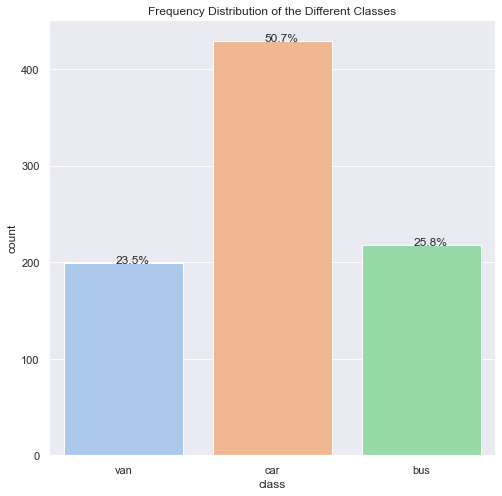

In [11]:
# Check Frequency of class

sns.set(rc={"figure.figsize": (8, 8)});
ax=sns.countplot(veh['class'],palette='pastel');
plt.title('Frequency Distribution of the Different Classes');
add_percentage(ax,veh['class']);

* 51% of the data is from the cars and rest 49% is from van and bus.

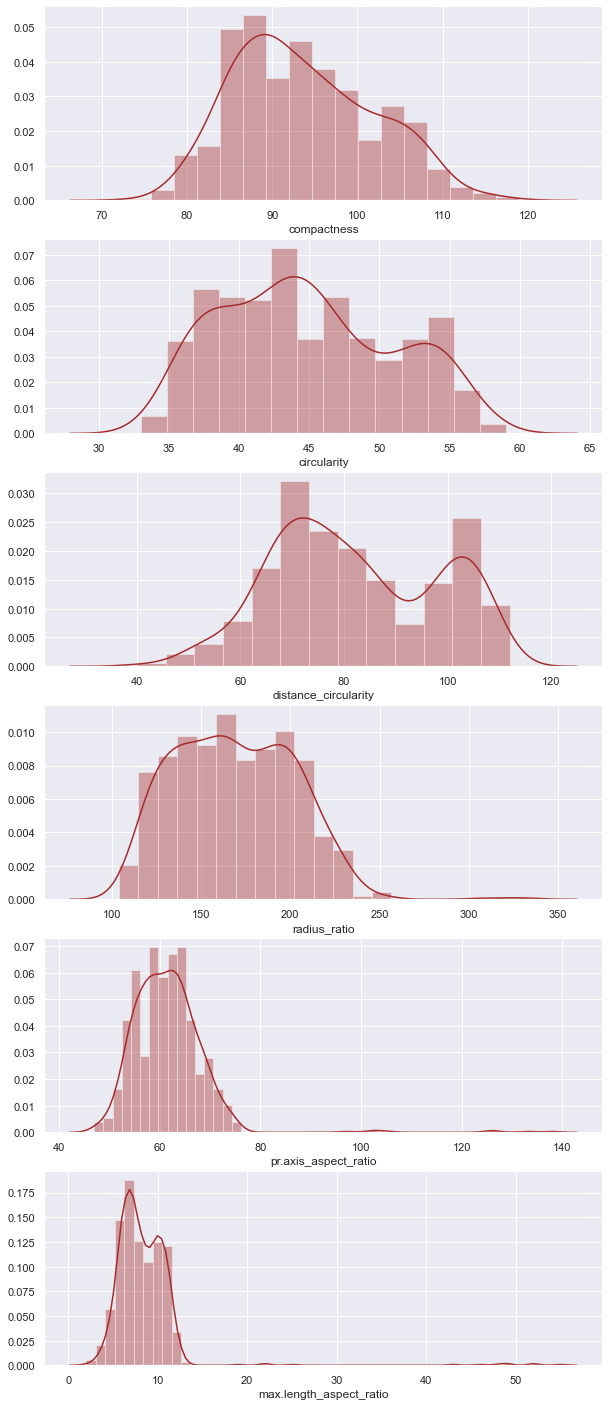

In [12]:
# Distribution plots of predictors

plt.figure(figsize=(10,25))

plt.subplot(6,1,1)
sns.distplot(veh.compactness,color='brown');

plt.subplot(6,1,2)
sns.distplot(veh.circularity,color='brown');

plt.subplot(6,1,3)
sns.distplot(veh.distance_circularity,color='brown');

plt.subplot(6,1,4)
sns.distplot(veh.radius_ratio,color='brown');

plt.subplot(6,1,5)
sns.distplot(veh["pr.axis_aspect_ratio"],color='brown');

plt.subplot(6,1,6)
sns.distplot(veh["max.length_aspect_ratio"],color='brown');

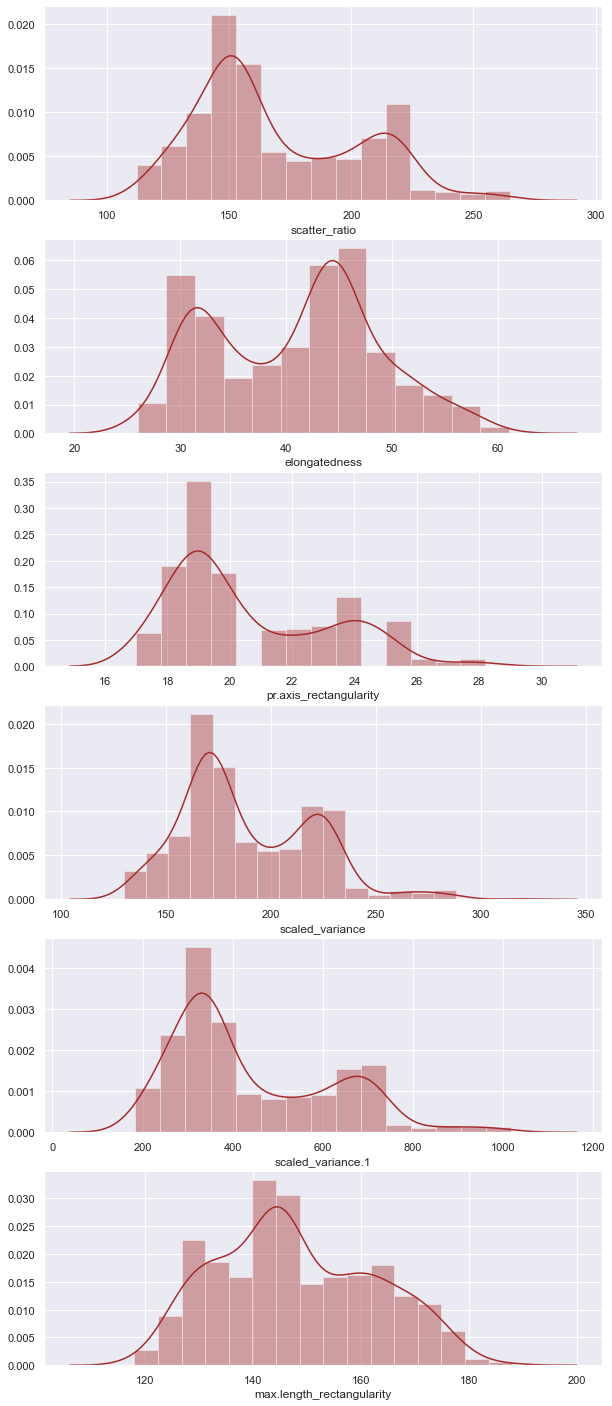

In [13]:
# Distribution plots of predictors

plt.figure(figsize=(10,25))

plt.subplot(6,1,1)
sns.distplot(veh.scatter_ratio,color='brown');

plt.subplot(6,1,2)
sns.distplot(veh.elongatedness,color='brown');

plt.subplot(6,1,3)
sns.distplot(veh['pr.axis_rectangularity'],color='brown');

plt.subplot(6,1,4)
sns.distplot(veh.scaled_variance,color='brown');

plt.subplot(6,1,5)
sns.distplot(veh["scaled_variance.1"],color='brown');

plt.subplot(6,1,6)
sns.distplot(veh["max.length_rectangularity"],color='brown');

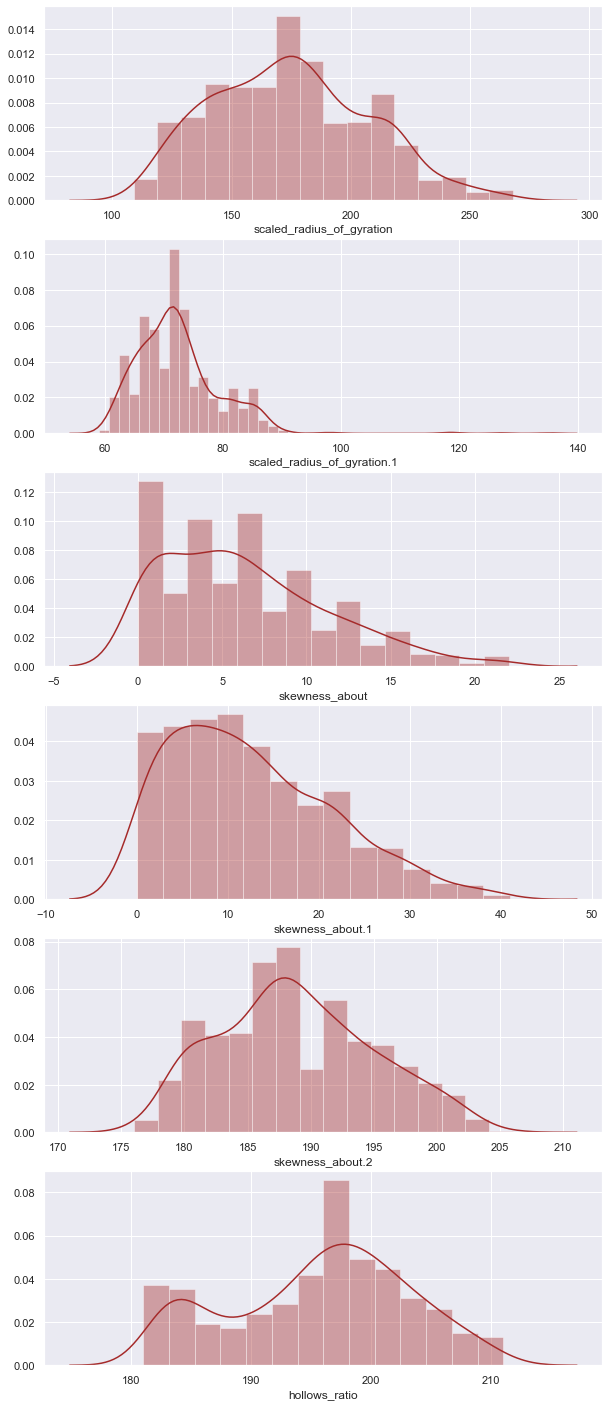

In [14]:
# Distribution plots of predictors

plt.figure(figsize=(10,25))

plt.subplot(6,1,1)
sns.distplot(veh.scaled_radius_of_gyration,color='brown');

plt.subplot(6,1,2)
sns.distplot(veh['scaled_radius_of_gyration.1'],color='brown');

plt.subplot(6,1,3)
sns.distplot(veh.skewness_about,color='brown');

plt.subplot(6,1,4)
sns.distplot(veh['skewness_about.1'],color='brown');

plt.subplot(6,1,5)
sns.distplot(veh["skewness_about.2"],color='brown');

plt.subplot(6,1,6)
sns.distplot(veh["hollows_ratio"],color='brown');

* Most of the features indicate presence of 2-3 clusters in the data.
* Also, some features (example max length aspect ratio and praxis axis aspect ratio) have very long tail. This indicates presence of outliers in those features.

#### Study the Outliers

* To study the presence of outliers in the data we will take help from box-plots.
* We would construct the box-plots class-wise. This is because from the distribution plots it is clear that the data has few clusters. Also, the expectation is that bus, van and cars would be readily distinguishable. This means that it is anticipated that the features will vary across the class.

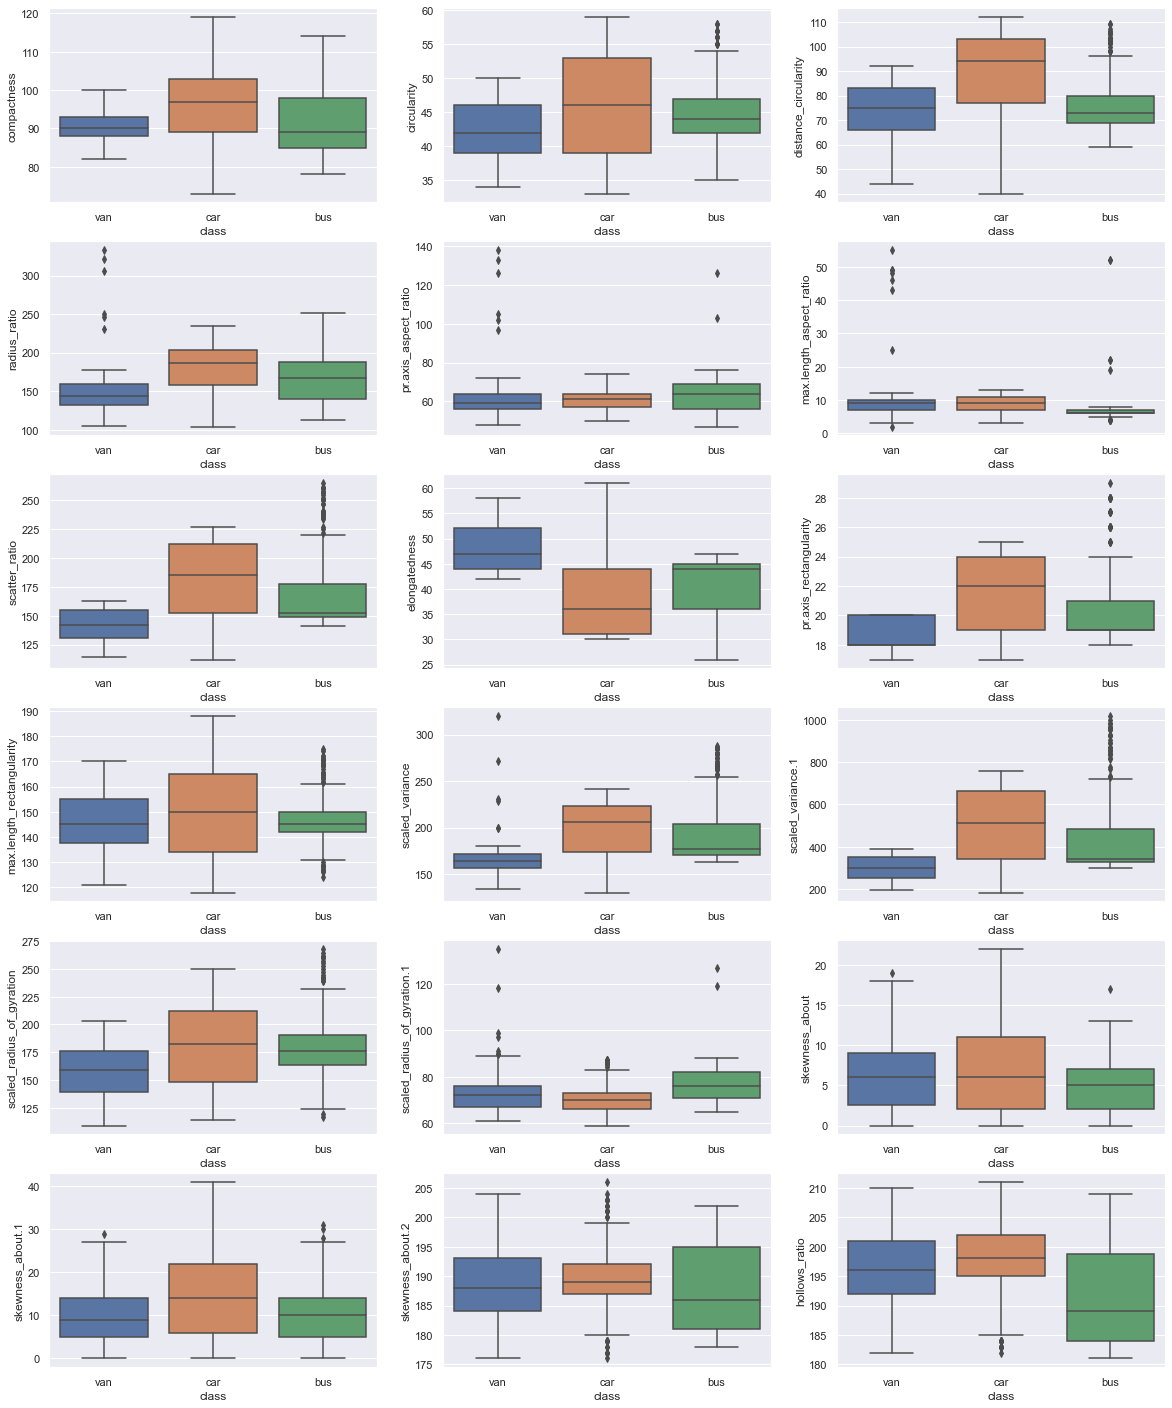

In [15]:
# Box-plots by class to find outliers

fig,axs = plt.subplots(6,3,figsize=(20,25));

sns.boxplot(x="class", y="compactness",data=veh,ax=axs[0,0]);
sns.boxplot(x="class", y="circularity",data=veh,ax=axs[0,1]);
sns.boxplot(x="class", y="distance_circularity",data=veh,ax=axs[0,2]);
sns.boxplot(x="class", y="radius_ratio",data=veh,ax=axs[1,0]);
sns.boxplot(x="class", y="pr.axis_aspect_ratio",data=veh,ax=axs[1,1]);
sns.boxplot(x="class", y="max.length_aspect_ratio",data=veh,ax=axs[1,2]);
sns.boxplot(x="class", y="scatter_ratio",data=veh,ax=axs[2,0]);
sns.boxplot(x="class", y="elongatedness",data=veh,ax=axs[2,1]);
sns.boxplot(x="class", y="pr.axis_rectangularity",data=veh,ax=axs[2,2]);
sns.boxplot(x="class", y="max.length_rectangularity",data=veh,ax=axs[3,0]);
sns.boxplot(x="class", y="scaled_variance",data=veh,ax=axs[3,1]);
sns.boxplot(x="class", y="scaled_variance.1",data=veh,ax=axs[3,2]);
sns.boxplot(x="class", y="scaled_radius_of_gyration",data=veh,ax=axs[4,0]);
sns.boxplot(x="class", y="scaled_radius_of_gyration.1",data=veh,ax=axs[4,1]);
sns.boxplot(x="class", y="skewness_about",data=veh,ax=axs[4,2]);
sns.boxplot(x="class", y="skewness_about.1",data=veh,ax=axs[5,0]);
sns.boxplot(x="class", y="skewness_about.2",data=veh,ax=axs[5,1]);
sns.boxplot(x="class", y="hollows_ratio",data=veh,ax=axs[5,2]);



* There's outliers in most of the features across the different vehicle types.
* For most of the features the distribution of the predictors vary across the vehicle type.

#### Outlier Treatment

In [16]:
# Subsetting data based on each class

veh1 = veh.copy()

veh_van = veh1[veh1['class'] == 'van']
veh_car = veh1[veh1['class'] == 'car']
veh_bus = veh1[veh1['class'] == 'bus']

# Dropping the 'class' variable from each data

veh_van=veh_van.drop(['class'], axis = 1)
veh_car=veh_car.drop(['class'], axis = 1)
veh_bus=veh_bus.drop(['class'], axis = 1)

#  Computing IQR for each data

Q1_van = veh_van.quantile(0.25)
Q3_van = veh_van.quantile(0.75)
IQR_van = Q3_van - Q1_van

Q1_car = veh_car.quantile(0.25)
Q3_car = veh_car.quantile(0.75)
IQR_car = Q3_car - Q1_car

Q1_bus = veh_bus.quantile(0.25)
Q3_bus = veh_bus.quantile(0.75)
IQR_bus = Q3_bus - Q1_bus

In [17]:
# Replace every outlier on the lower side by the lower whisker in each data
for i, j in zip(np.where(veh_van < Q1_van - 1.5 * IQR_van)[0], np.where(veh_van < Q1_van - 1.5 * IQR_van)[1]): 
    
    whisker  = Q1_van - 1.5 * IQR_van
    veh_van.iloc[i,j] = whisker[j]
    
    
for i, j in zip(np.where(veh_car < Q1_car - 1.5 * IQR_car)[0], np.where(veh_car < Q1_car - 1.5 * IQR_car)[1]): 
    
    whisker  = Q1_car - 1.5 * IQR_car
    veh_car.iloc[i,j] = whisker[j]
    

for i, j in zip(np.where(veh_bus < Q1_bus - 1.5 * IQR_bus)[0], np.where(veh_bus < Q1_bus - 1.5 * IQR_bus)[1]): 
    
    whisker  = Q1_bus - 1.5 * IQR_bus
    veh_bus.iloc[i,j] = whisker[j]
    

In [18]:
#Replace every outlier on the upper side by the upper whisker in each data
for i, j in zip(np.where(veh_van > Q3_van + 1.5 * IQR_van)[0], np.where(veh_van > Q3_van + 1.5 * IQR_van)[1]): 
    
    whisker  = Q3_van + 1.5 * IQR_van
    veh_van.iloc[i,j] = whisker[j]
    
    
for i, j in zip(np.where(veh_car > Q3_car + 1.5 * IQR_car)[0], np.where(veh_car > Q3_car + 1.5 * IQR_car)[1]): 
    
    whisker  = Q3_car + 1.5 * IQR_car
    veh_car.iloc[i,j] = whisker[j]
    

for i, j in zip(np.where(veh_bus > Q3_bus + 1.5 * IQR_bus)[0], np.where(veh_bus > Q3_bus + 1.5 * IQR_bus)[1]): 
    
    whisker  = Q3_bus + 1.5 * IQR_bus
    veh_bus.iloc[i,j] = whisker[j]
    

In [19]:
veh_van['class']='van'
veh_car['class']='car'
veh_bus['class']='bus'
    
veh1 = veh_van.append([veh_car, veh_bus],ignore_index=True)

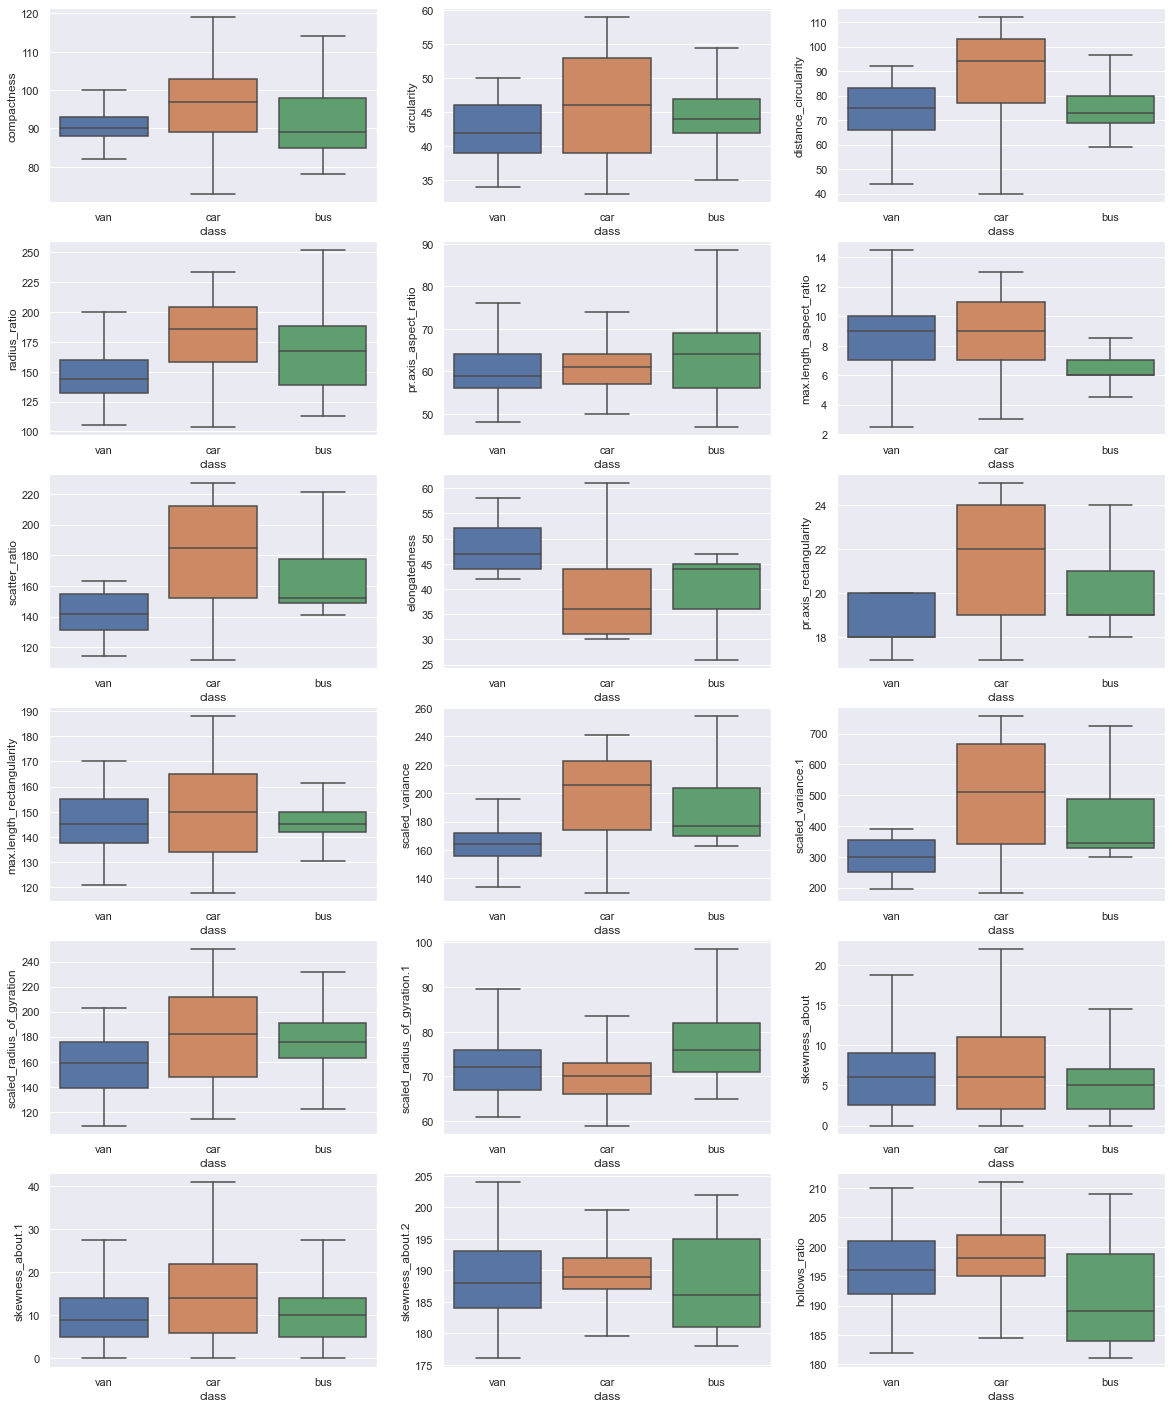

In [20]:
# Box-plots to verify removal of outliers

fig,axs = plt.subplots(6,3,figsize=(20,25));

sns.boxplot(x="class", y="compactness",data=veh1,ax=axs[0,0]);
sns.boxplot(x="class", y="circularity",data=veh1,ax=axs[0,1]);
sns.boxplot(x="class", y="distance_circularity",data=veh1,ax=axs[0,2]);
sns.boxplot(x="class", y="radius_ratio",data=veh1,ax=axs[1,0]);
sns.boxplot(x="class", y="pr.axis_aspect_ratio",data=veh1,ax=axs[1,1]);
sns.boxplot(x="class", y="max.length_aspect_ratio",data=veh1,ax=axs[1,2]);
sns.boxplot(x="class", y="scatter_ratio",data=veh1,ax=axs[2,0]);
sns.boxplot(x="class", y="elongatedness",data=veh1,ax=axs[2,1]);
sns.boxplot(x="class", y="pr.axis_rectangularity",data=veh1,ax=axs[2,2]);
sns.boxplot(x="class", y="max.length_rectangularity",data=veh1,ax=axs[3,0]);
sns.boxplot(x="class", y="scaled_variance",data=veh1,ax=axs[3,1]);
sns.boxplot(x="class", y="scaled_variance.1",data=veh1,ax=axs[3,2]);
sns.boxplot(x="class", y="scaled_radius_of_gyration",data=veh1,ax=axs[4,0]);
sns.boxplot(x="class", y="scaled_radius_of_gyration.1",data=veh1,ax=axs[4,1]);
sns.boxplot(x="class", y="skewness_about",data=veh1,ax=axs[4,2]);
sns.boxplot(x="class", y="skewness_about.1",data=veh1,ax=axs[5,0]);
sns.boxplot(x="class", y="skewness_about.2",data=veh1,ax=axs[5,1]);
sns.boxplot(x="class", y="hollows_ratio",data=veh1,ax=axs[5,2]);

* There is no more outlier in the data. We now move with the correlation analysis.

In [21]:
# One Hot Encoding of categorical variables and basic data checks

labelencoder = LabelEncoder()  

veh2 = veh1.copy()

veh2['class'] = labelencoder.fit_transform(veh2['class'])

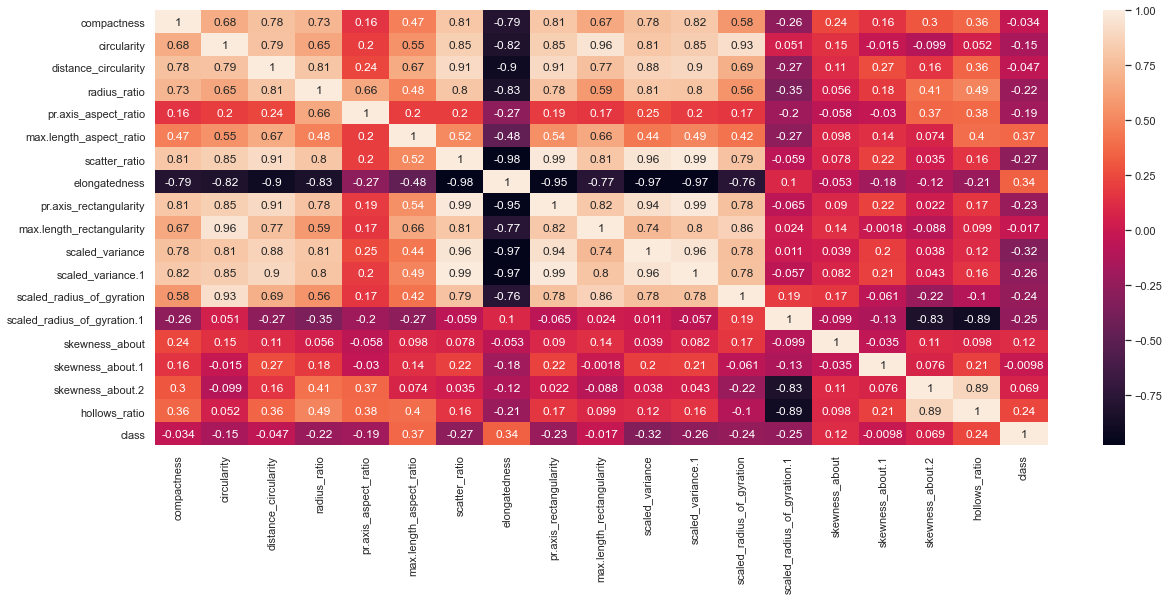

In [22]:
fig, ax = plt.subplots(figsize = [20, 8])
corr = veh2.corr() 
sns.heatmap(corr, annot = True);

* There is very strong correlation (both positive and negative) between some variables.

    Example elongatedness is negatively correlated with most of the features and compactness and circularity is positively correlated with distance circularity, radius ratio etc.
    
* Correlation between target and predictors is weak which indicate that the relationship between the target and predictors is non-linear.

#### Additional Feature Creation

* The features (predictors) have not been explained in details that what each of them mean. It is hence difficult to compute new features from them as those may not convey any valuable information in terms of business.

* We saw that most of the features here are skewed. Hence we can transform them (recirocal, square, square root, Box-Cox etc) and may consider those features as new features. However, here we will fit SVM and since SVM does not require the assumption of normality of predictors we may skip that. It's important to note that the transformations do not guarantee symmetry, however, the transformations (particularly Box-Cox) reduces skewness to a huge extent.

<a id='SVC1'></a>
### Classifier - SVC

#### Design and Train SVM

In [23]:
# Split data into test and train set

X_train, X_test, y_train, y_test = train_test_split(veh1.loc[:, veh1.columns != 'class'], veh1['class'], stratify=veh1['class'], random_state=11)

X_train.shape
X_test.shape

(634, 18)

(212, 18)

In [24]:
# Scaling data before SVC

X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [25]:
# Fit SVC

svc = SVC()
classi=svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.978
Accuracy on test set: 0.976


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

         bus       0.96      1.00      0.98        55
         car       0.98      0.97      0.98       107
         van       0.98      0.96      0.97        50

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



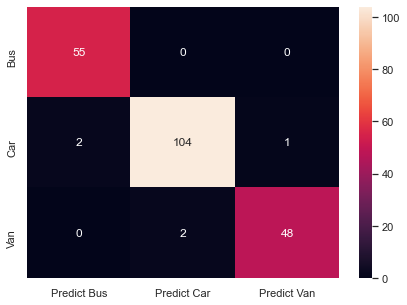

In [26]:
y_predict = classi.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_predict, labels=["bus", "car","van"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Bus","Car","Van"]],
                  columns = [i for i in ["Predict Bus","Predict Car","Predict Van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict))


* The accuracy scores are good for both train and test data.
* The other metrices like precison, recall and f1-score are also high. Hence we conclude the model is good and do not perform any other regularization.

<a id='PCA'></a>
### Dimension Reduction

We use Principal Component Analysis (PCA) to reduce the dimensions of the data.

In [27]:
# # Segregate predictors vs target attributes on the original data

X = veh1.drop('class',axis=1)
Y = veh1['class']


In [28]:
# Scaling data before PCA

XScaled = X.apply(zscore)

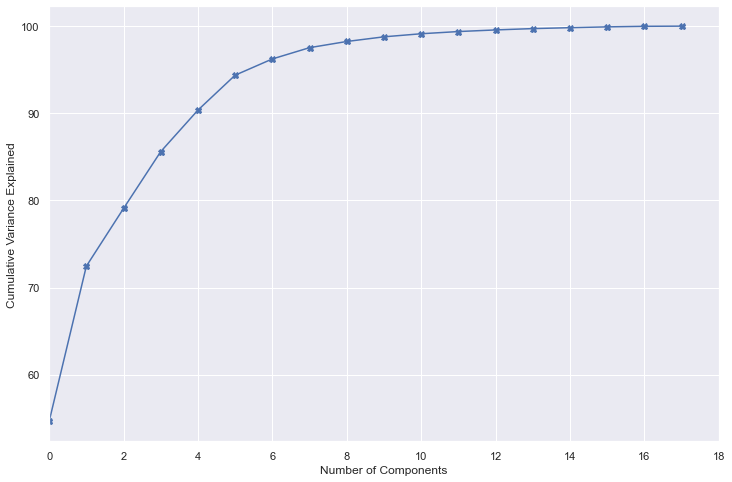

In [29]:
# Applying PCA

pca = PCA()
X_pca_ = pca.fit_transform(XScaled)

plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained');

* From the above diagram we can say 4 components explain around 90% of the variability, while 6 components explain around 97% variability. We can check between 4-6 components.

In [30]:
# Using 6 components and printing the eigen vectors

pca = PCA(n_components=6)
pca.fit(XScaled)

print('The loadings are :\n')
print(pca.components_)
print()

print('The Eigen values are :\n')
print(pca.explained_variance_ratio_)
Xpca = pca.transform(XScaled)

PCA(n_components=6)

The loadings are :

[[-0.26978713 -0.28492246 -0.3006597  -0.27413414 -0.09945454 -0.19808241
  -0.31004195  0.30617828 -0.30815538 -0.27524106 -0.30028528 -0.30786901
  -0.2587752   0.05268651 -0.04211032 -0.05904976 -0.04517869 -0.0936783 ]
 [-0.08072377  0.1512086  -0.04709468 -0.18079377 -0.2197668  -0.08290325
   0.06510923 -0.0282888   0.065662    0.13096561  0.07698471  0.06494928
   0.22409147  0.50063747 -0.0376369  -0.10272882 -0.5162177  -0.51438469]
 [-0.03256707 -0.19608285  0.07783596  0.03558082 -0.11637945 -0.11924399
   0.10971613 -0.10162345  0.10129381 -0.20885276  0.13847064  0.10701169
  -0.21247357  0.05990354 -0.52187905  0.69930736 -0.07952006 -0.04568656]
 [-0.17116449  0.02031695 -0.09327699  0.27465943  0.65991592 -0.1537698
  -0.01961022 -0.05112539 -0.0451755  -0.03555292  0.06405682 -0.02076074
   0.05428452  0.15562309 -0.52459299 -0.32996201  0.02511583 -0.06565805]
 [ 0.1844069  -0.12263286 -0.10061022  0.16146359  0.10234419 -0.69689884
   0.08331623 -

In [31]:
# Constructing the PCA Data

pca_df = pd.DataFrame(data = Xpca, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.596827,-0.508789,-0.479164,0.938787,-0.915862,1.493363
1,1.519761,-0.430782,-0.195696,-1.146360,-0.524056,0.206028
2,1.524906,-3.071543,-0.452167,-0.198148,-0.703110,-0.369778
3,1.982332,-1.498873,-1.104674,0.942956,-1.130583,-0.316722
4,4.423201,-3.418472,0.486631,0.083104,-0.477978,-0.609162


* PCA not only reduces dimension, it also removes the presence of multi-collinearity between the predictors. We will confirm the same by finding the correlation between the components.

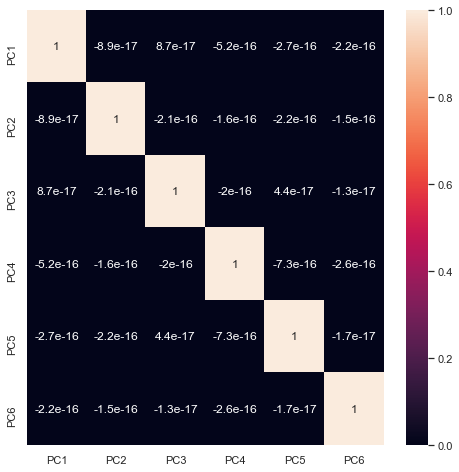

In [32]:
fig, ax = plt.subplots(figsize = [8,8])
corr = pca_df.corr() 
sns.heatmap(corr, annot = True);

* By the above plot - we can confirm that the multi-collineraity has been removed.

<a id='SVC2'></a>
### Classifier - SVC

In [33]:
#splitting the PCA data into train and test 70:30

X_train, X_test, y_train, y_test = train_test_split(pca_df, Y, stratify=Y, random_state = 11)

X_train.shape
X_test.shape

(634, 6)

(212, 6)

In [34]:
# Fit SVC (We need not scale the data as while doing PCA we have already scaled it)

svc = SVC()
classi=svc.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.940
Accuracy on test set: 0.925


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

         bus       0.90      0.96      0.93        55
         car       0.93      0.93      0.93       107
         van       0.93      0.86      0.90        50

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.93      0.92      0.92       212



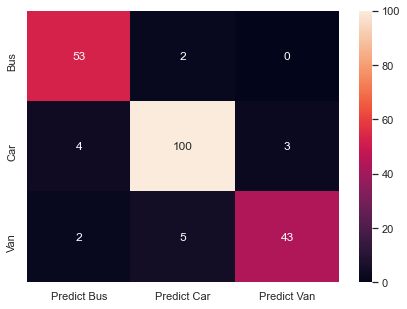

In [35]:
y_predict = classi.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=["bus", "car","van"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Bus","Car","Van"]],
                  columns = [i for i in ["Predict Bus","Predict Car","Predict Van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict))


* The accuracy has decreased a bit using the dimension reduction. However, we have achieved the same by using only 6 dimensions instead of the original 18.
* Also, while reducing the dimensions we have ensured that we have removed the multi-collinearity that was present in the data.

<a id='Imp'></a>
### Improvisations

* Some of the features used appears to be derived from other. Also, there was no clarity provided on the meaning of the features. Thus, in absence of domain knowledge the findings are difficult to interpret.
* There were some issues with the quality of the data due to outliers.
* 51% of the data belong to category car. This could have been tackled by using only one type of car or by increasing the frequencies of the buses and vans.